## <center><font color=green> Convert Labelme Json Files to Masks for Training and Evaluation</font></center>

**Author(s)**: [Zhehua Mao](z.mao@ucl.ac.uk), [Miguel Xochicale](m.xochicale@ucl.ac.uk)   
**Contributor(s)**: Steve Thompson, Sophia Bano, Matt Clarkson at UCL; and Mikael Brudfors at NVIDIA

## Setting up google colabs
* You will need to first log in to your google account.
* Open notebook in google-colabs [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1B_l_3r0ecJzpntDjwZtHHkOHWkvmIVBA)
* Setting up the runtime type to GPU by clicking: Edit > Notebook settings > Python 3 > T4 GPU (other any other GPU or TPU)
* After that you can click `Runtime` -> `Run all` **OR** run the codes step by step by clicking `Run cell` button in the notebook.

# Introduction

In this hands-on activity, you will learn how to convert our annotation on an image (created by with labelme) into a mask that can be used for training and evaluation.

# Import dependencies

In [ ]:
import os
import json
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Read the original image

In [ ]:
# suppose we saved our json files and images in Google drive, let's mount it first
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_path = '/content/drive/MyDrive/Colab Notebooks/data/cju0s2a9ekvms080138tjjpxr.jpg'

In [ ]:
img_bgr = cv2.imread(img_path)

In [ ]:
img_bgr.shape

(547, 626, 3)

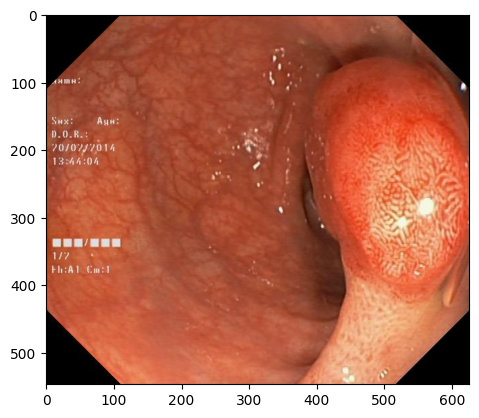

In [ ]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## Create an empty image

0-background

In [ ]:
img_mask = np.zeros(img_bgr.shape[:2])

In [ ]:
img_mask

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

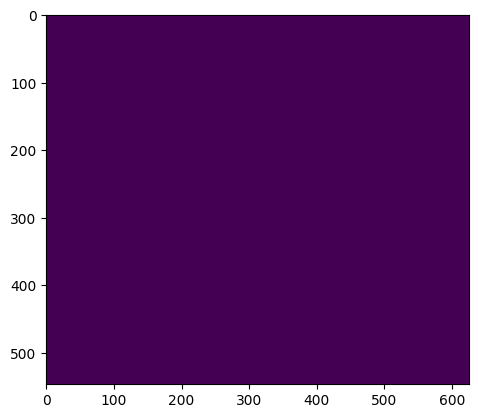

In [ ]:
plt.imshow(img_mask)
plt.show()

## Read the json created from labelme

In [ ]:
labelme_json_path = '/content/drive/MyDrive/Colab Notebooks/data/cju0s2a9ekvms080138tjjpxr.json'

In [ ]:
with open(labelme_json_path, 'r', encoding='utf-8') as f:
    labelme = json.load(f)

In [ ]:
labelme.keys()

dict_keys(['version', 'flags', 'shapes', 'imagePath', 'imageData', 'imageHeight', 'imageWidth'])

## Metadata

In [ ]:
labelme['version']

'5.3.1'

In [ ]:
# file name of the image
labelme['imagePath']

'cju0s2a9ekvms080138tjjpxr.jpg'

In [ ]:
# image height
labelme['imageHeight']

547

In [ ]:
# image width
labelme['imageWidth']

626

## Print all information about annotation

In [ ]:
# labelme['shapes']

In [ ]:
for each in labelme['shapes']:
    print(each['label'], each['shape_type'])

polyp polygon


## Print the information of each class and the order of drawing masks

In [ ]:
# 0-background，start with class 1
class_info = [
    {'label':'polyp', 'type':'polygon', 'color':1},     # polygon
]

## Draw the mask on the empty image

In [ ]:
for one_class in class_info: # Go through each class in order
    for each in labelme['shapes']: # Go through all annotations to find the annotations that belong to the current class
        if each['label'] == one_class['label']:
            if one_class['type'] == 'polygon': # polygon

                # Get the coordinates
                points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]

                # draw mask（closed region）
                img_mask = cv2.fillPoly(img_mask, points, color=one_class['color'])

            elif one_class['type'] == 'line' or one_class['type'] == 'linestrip': # line

                points = [np.array(each['points'], dtype=np.int32).reshape((-1, 1, 2))]

                # draw mask（open region）
                img_mask = cv2.polylines(img_mask, points, isClosed=False, color=one_class['color'], thickness=one_class['thickness'])

            elif one_class['type'] == 'circle': # circle
                points = np.array(each['points'], dtype=np.int32)

                center_x, center_y = points[0][0], points[0][1] # coordinates of center point of the circle

                edge_x, edge_y = points[1][0], points[1][1]

                radius = np.linalg.norm(np.array([center_x, center_y] - np.array([edge_x, edge_y]))).astype('uint32') # radius

                img_mask = cv2.circle(img_mask, (center_x, center_y), radius, one_class['color'], one_class['thickness'])

            else:
                print('unknown class', one_class['type'])

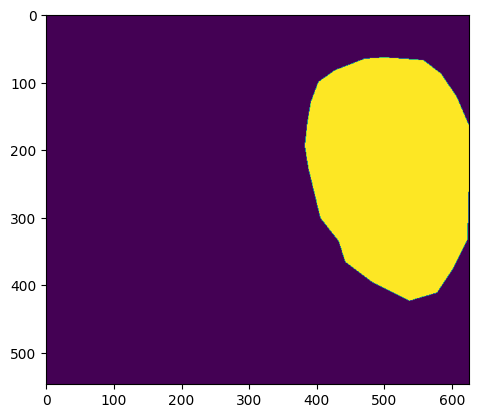

In [ ]:
plt.imshow(img_mask)
plt.show()

## Save masks into PNG files

In [ ]:
img_mask.shape

(547, 626)

In [ ]:
mask_path = img_path.split('.')[0] + '.png'

In [ ]:
cv2.imwrite(mask_path, img_mask)

True

## Take a look at saved mask

In [ ]:
mask_img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/data/cju0s2a9ekvms080138tjjpxr.png')

In [ ]:
mask_img.shape

(547, 626, 3)

In [ ]:
np.unique(mask_img)

array([0, 1], dtype=uint8)

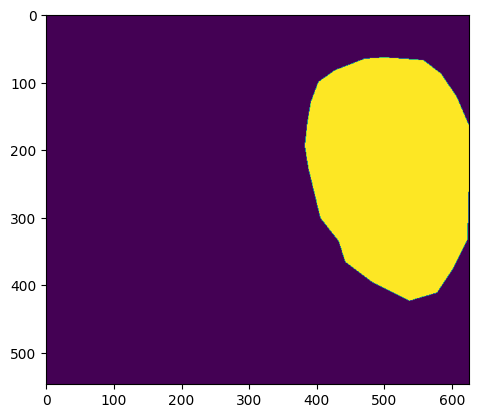

In [ ]:
plt.imshow(mask_img[:,:,0])
plt.show()

# Question
<div>
<img src="https://drive.google.com/uc?export=view&id=17F9TTjlpGa5H4BeFzDGd8e0VzWrydtTq" width="400"/>
</div>

In this example, we created the mask for a single image. If we have a collection of images, do you know how to convert them? Give it a try!